In [5]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import pickle as pkl
import notebook_helper
import sys
sys.path.append('../experiments/')
results_dir = '../results/feb12_fmri_sweep/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load the results into a pandas dataframe

In [6]:
dir_names = sorted([fname
                    for fname in os.listdir(results_dir)
                    if os.path.isdir(join(results_dir, fname))
                    and os.path.exists(join(results_dir, fname, 'results.pkl'))
                    ])
results_list = []
for dir_name in tqdm(dir_names):
    ser = pd.Series(
        pkl.load(open(join(results_dir, dir_name, 'results.pkl'), "rb")))
    results_list.append(ser)

r = pd.concat(results_list, axis=1).T.infer_objects()
r.to_pickle(join(results_dir, 'results_aggregated.pkl'))


# favorites
# 'time' (voxel_num = 10)

100%|██████████| 200/200 [00:00<00:00, 4605.66it/s]


In [17]:
# display full strings
with pd.option_context('display.max_colwidth', -1, 'display.max_rows', 200):

    display(
        r
        .sort_values(by='top_score_synthetic', ascending=False)
        .filter(['top_score_synthetic', 'top_explanation_init_strs', 'explanation_init_ngrams', 'module_num', 'fmri_test_corr'])
        # .filter(['top_explanation_init_strs', 'explanation_init_ngrams', 'top_strs_added'])
        # .filter(['explanation_init_strs', 'explanation_init_ngrams',])
        .head(n=20)
        .round(3)
    )

,top_score_synthetic,top_explanation_init_strs,explanation_init_ngrams,module_num,fmri_test_corr
14,0.064,"events or activities related to school, holidays, or other special occasions","[end the video, for first grade, surgeries on the, at the reunion, this au pair, event beginning of, of letters, school for social, of fine arts, announcing an introductory, for social, after the reveal, thanksgiving video address, last trimester of, the home stretch, a village or, a blowjob after, in first grade, coming up for, press conference with, valentine 's day, invited to speak, surgeries on, this photo shoot, dr upward, end of, place the first, the treatment of, promoted up into, after senior year, at a funeral, emergency liver, at the holiday, dates with other, writes this on, start in kindergarten, home for thanksgiving, first week of, absence after the, this brochure for, end of class, for moving up, showed up unannounced, for memorial day, found this brochure, for this photo, these details to, us on sunday, after the show, say a uterus, end of the, for the monthly, thanksgiving after, on sunday, promoted up, senior year, of childcare experience, his obituary, duty after school, first grade, on the home, a press conference, dates with, also see a, this brochure, day of art, at school, to inform you, the first place, name hobby, photographed by this, sta, at the funeral, send a copy, on stage at]",97,0.641
19,0.057,"mention of the name ""thoreau""","[thoreau and, morph, yeah yeah whatever, mm mm so, thoreau fellow, yeah yeah that, hopping dots morph, thoreau fellow and, to camp thoreau, magazine and he, explain so i, totally get it, clemens and, uh so cause, dots morph, proofing problem and, yeah the reason, and lucidity, yeah yeah, b, example he, okay uh and, thoreau on, deductible, as sloth because, at camp thoreau, reason that, and b he, solution so, problem and um, and broncos, point so, yeah yeah yeah, yeah whatever, second that, uh and that, morph back, blah blah not, harry potter where, strap and then, mm so, then pull three, b he, sloth because, ndepp is that, well yeah, uh uh i, memorial day that, deflect um y, and b, get that, broncos, hit and, strap and, yeah go go, mean by that, and gi joe, bang and, second reason, and imitate because, uh oh my, second reason is, thoreau that, well um yes, the second reason, digression i, uh uh this, objector and so, uh alright and, shorts for, solution and, pragmatic than, thoreau on an, solution and then, uh uh uh]",182,0.620
35,0.054,"money, as many of them contain words related to currency such as ""pence"" and ""five pence""","[deductible, cuz that 's, and went down, pence, seventy five pence, and part, like they 'll, twenty pence, that 's the, pence in, five pence, no wait i, washes it off, and part of, pence in and, wait hold on, you know nuh, it he 'd, wait wait hold, and over like, over and i, and it hit, and over, cuz it, earn up to, it it 's, ten days and, up all of, here 's this, forty five minutes, ten twelve, it there 's, work it 's, because that was, five pence i, eight weeks and, off it 'll, because the scars, dollar deductible, thing we 're, tap on my, do n't those, twenty pence in, down they 'd, those days when, over and shows, over and, unsent, there there, some bitch, over and uh, thousand dollar deductible, it 's there, slice of sizzling, a part of, no wait, like two weeks, it 's okay, pence i, just gushing, there there 's, think it 'll, that 's what, like two minutes, gushing, think blats, six weeks and, wait hold, them there 's, up do n't, five minutes and, there 's there, darn good now, sta that, five minutes out]",166,0.623
39,0.052,action or result,"[the result was, result was, in a committed, did a sold, had elected not, up for tenure, losing in the, x, women, was the creative, never as myself, a fetal, there 's his, event it, cause if, at a steiner, party ended, goes pff, the result, determined not, as myself, the women, and as he, even as a, in a group, there 

In [12]:
r.keys()

Index(['subsample_frac', 'checkpoint', 'checkpoint_module', 'seed', 'save_dir',
       'module_name', 'module_num', 'method_name', 'num_top_ngrams',
       'num_summaries', 'num_synthetic_strs', 'use_cache', 'save_dir_unique',
       'fmri_test_corr', 'explanation_init_ngrams', 'explanation_init_strs',
       'explanation_init_rationales', 'strs_added', 'strs_removed',
       'score_synthetic', 'top_explanation_init_strs', 'top_strs_added',
       'top_strs_removed', 'top_score_synthetic'],
      dtype='object')

/home/chansingh/.embgam/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


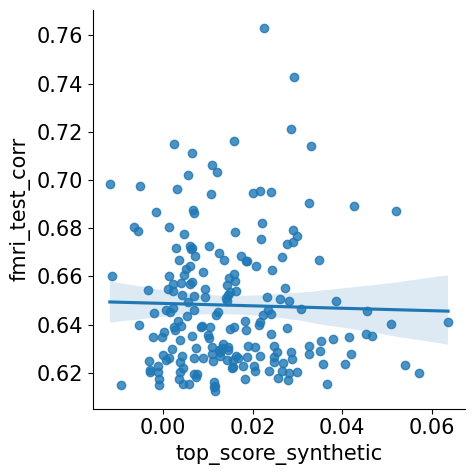

In [14]:
sns.lmplot(x='top_score_synthetic', y='fmri_test_corr', data=r)
plt.show()